In [112]:
import numpy as np
import matplotlib.pyplot as plt

Things to include

- Solve Bang-Bang
- Solve Bang-SingularBang
- Plot trajectories
- Account for:
  - Mass of rocket
  - Reduction in mass of fuel due to expenditure
  - Air restistance drag D(h, v)
  - Max fuel expenditure


In [107]:
dry_mass = .6
init_fuel = .4

force_to_fuel_consumtion = .3 # Δm = -F/c
drag = lambda v,h: 1/2*v**2*(620*np.exp(500))*np.exp(-500*h)
Ddrag = lambda v,h: v*(620* np.exp(500))*np.exp(-500*h)

class Rocket(object):
    """
    Solves the Rocket Problem (Goddard Problem) of obtaining a maximimum height
     using a specified amount of fuel, with a drag as a function of height/velocity
     
    Params
    ------
    
    dry_mass : float
        descr
    fuel_mass : float
    drag : function
    f_max : float
    
    """
    def __init__(self, dry_mass, fuel_mass, drag, Ddrag, f_max=3.5):
        self.verbose = 0
        self.g = 9.8
        self.g = 1
        self.dry_mass = dry_mass
        self.init_fuel = init_fuel
        self.mass = dry_mass + init_fuel
        self.drag = drag
        self.Ddrag = Ddrag
        self.f_max = f_max
        self.c = 500
        self.beta = 500
        
    def _update(self, force, state, dt):
        if self.verbose:
            print('update')
            print('state', state)
            print('force', force)
            print('drag', self.drag(v0,h0))
        v0, h0, m0 = state
        v1 = v0 + dt*(1/m0*(force - self.drag(v0, h0)) - self.g)
        h1 = h0 + dt*(v0)
        m1 = m0 + dt*(-force/self.c)
        return np.array([v1, h1, m1])
    
    def _in_arc(self, state, tol=1e-3):
        # May need to check tolerance
        v, h, m = state
        arc_check =  (self.drag(v, h) + m*self.g - v/self.c * self.drag(v, h)
                                - v*self.Ddrag(v, h))
        if self.verbose:
            print('arc_check',arc_check)
        return abs(arc_check) < tol

    def _arc_force(self, state):
        v, h, m = state
        return (self.drag(v, h) + m*self.g + m*self.g/(1 + 4*(self.c/v) +2*(self.c/v)**2)
                * (self.beta * self.c**2/self.g *(1 + v/self.c) - 1 - 2*self.c/v))
    
    #return heights, velocities, control
    def solve_bsb(self):
        i = 0
        dt = 1
        states = []
        state = np.array([0., 1., self.mass])
        
        while self.mass > self.dry_mass:
            states.append(state)
            v0, h0, m0 = state
            if not self._in_arc(state):
                if self.verbose:
                    print("At max force")
                force = self.f_max
            else:
                if self.verbose:
                    print("Arc force")
                force = self._arc_force(state)
            state = self._update(force, state, dt)
            if i < 10 and state[0]<0:
                state[0]=0
            if i>10 and state[1]<=0:
                break
            i+=1
            if self.verbose:
                print()
            if i>5000:
                break
        states.append(state)
        return np.array(states)
    
    def solve_bb(self):
        pass
    
    def solve_fixedforce(self):
        pass
    
    def plot_trajectories(self):
        pass
    
    

In [108]:
#def __init__(self, dry_mass, fuel_mass, drag, Ddrag, f_max=3.5):

dry_mass = .6
fuel_mass = .4
drag = lambda v,h: 1/2*v**2*(620* np.exp(500))*np.exp(-500*h)
Ddrag = lambda v,h: v*(620* np.exp(500))*np.exp(-500*h)

rocket = Rocket(dry_mass, fuel_mass, drag, Ddrag)

In [109]:
states = rocket.solve_bsb()

In [110]:
states.shape

(174, 3)

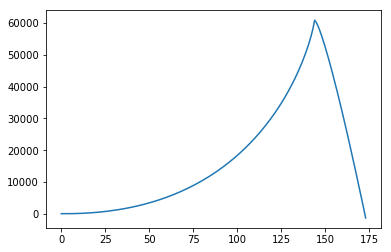

In [111]:
plt.plot(states[:,1])
plt.show()